+ ### Load hourly data

In [8]:
import csv
import pandas as pd

data = pd.read_csv('datasets/hourly_total.csv')
period = 14726
freq = 'H'
import matplotlib.pylab as plt
x_timestamp = pd.date_range('2021-04-01 0:00', periods=period, freq=freq).to_pydatetime().tolist()

# amount
stake_amount = data['stake']
unstake_amount = data['unstake']
deposit_amount = data['deposit']
redeem_amount = data['redeem']

# # of txs
stake_tx_count = data['stake_tx_count']
unstake_tx_count = data['unstake_tx_count']
deposit_tx_count = data['deposit_tx_count']
redeem_tx_count = data['redeem_tx_count']
bal_tx_count = stake_tx_count - unstake_tx_count + deposit_tx_count - redeem_tx_count

# # of unique addresses
stake_addr_count = data['stake_addr_count']
unstake_addr_count = data['unstake_addr_count']
deposit_addr_count = data['deposit_addr_count']
redeem_addr_count = data['redeem_addr_count']
bal_addr_count = stake_addr_count - unstake_addr_count + deposit_addr_count - redeem_addr_count


+ ### Show time series of features

3624 9456


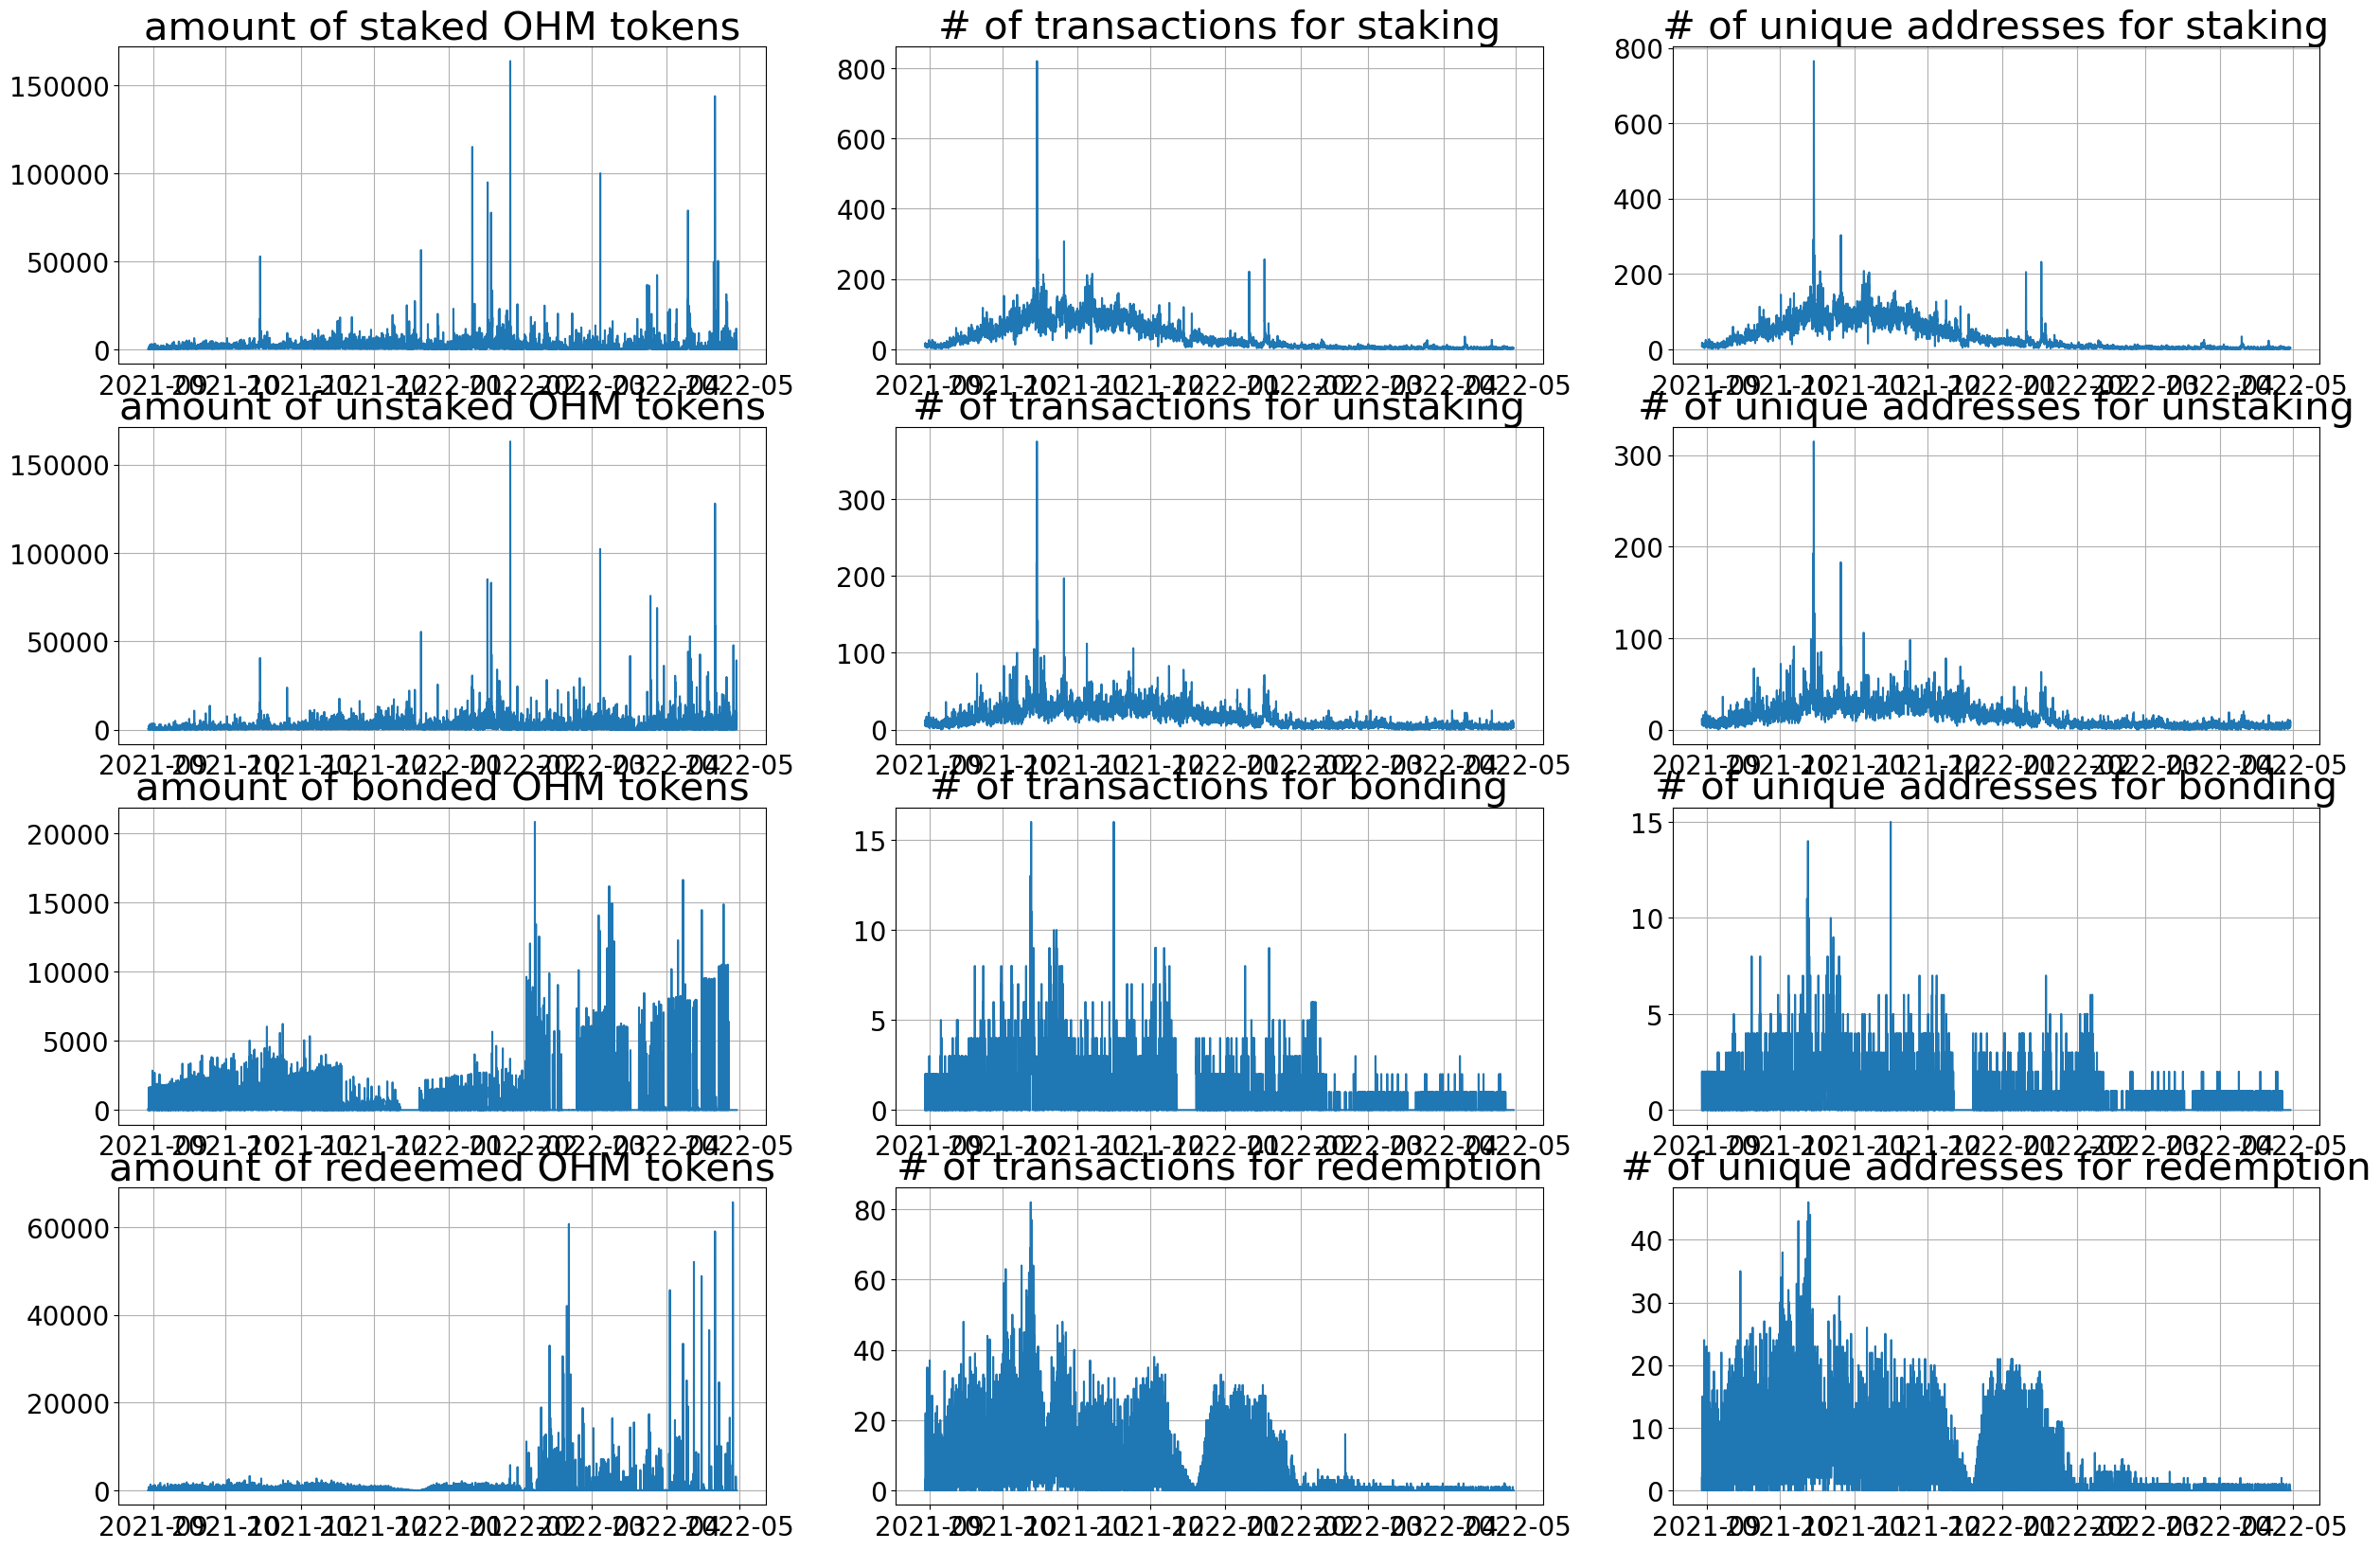

In [9]:
#show all
fig, axs = plt.subplots(4,3, sharex=False, figsize=(30, 20))

from datetime import datetime

start = '2021-08-30'
end = '2022-04-30'

i_s = x_timestamp.index(datetime.fromisoformat(start))
i_e = x_timestamp.index(datetime.fromisoformat(end))
print(i_s, i_e)


axs[0][0].plot(x_timestamp[i_s:i_e], stake_amount[i_s:i_e], label='stake')
axs[0][0].set_title('amount of staked OHM tokens')
axs[0][0].grid()

axs[1][0].plot(x_timestamp[i_s:i_e], unstake_amount[i_s:i_e], label='unstake')
axs[1][0].set_title('amount of unstaked OHM tokens')
axs[1][0].grid()

axs[2][0].plot(x_timestamp[i_s:i_e], deposit_amount[i_s:i_e], label='deposit')
axs[2][0].set_title('amount of bonded OHM tokens')
axs[2][0].grid()

axs[3][0].plot(x_timestamp[i_s:i_e], redeem_amount[i_s:i_e], label='redeem')
axs[3][0].set_title('amount of redeemed OHM tokens')
axs[3][0].grid()

axs[0][1].plot(x_timestamp[i_s:i_e], stake_tx_count[i_s:i_e], label='stake')
axs[0][1].set_title('# of transactions for staking')
axs[0][1].grid()

axs[1][1].plot(x_timestamp[i_s:i_e], unstake_tx_count[i_s:i_e], label='unstake')
axs[1][1].set_title('# of transactions for unstaking')
axs[1][1].grid()

axs[2][1].plot(x_timestamp[i_s:i_e], deposit_tx_count[i_s:i_e], label='deposit')
axs[2][1].set_title('# of transactions for bonding')
axs[2][1].grid()

axs[3][1].plot(x_timestamp[i_s:i_e], redeem_tx_count[i_s:i_e], label='redeem')
axs[3][1].set_title('# of transactions for redemption')
axs[3][1].grid()

axs[0][2].plot(x_timestamp[i_s:i_e], stake_addr_count[i_s:i_e], label='stake')
axs[0][2].set_title('# of unique addresses for staking')
axs[0][2].grid()

axs[1][2].plot(x_timestamp[i_s:i_e], unstake_addr_count[i_s:i_e], label='unstake')
axs[1][2].set_title('# of unique addresses for unstaking')
axs[1][2].grid()

axs[2][2].plot(x_timestamp[i_s:i_e], deposit_addr_count[i_s:i_e], label='deposit')
axs[2][2].set_title('# of unique addresses for bonding')
axs[2][2].grid()

axs[3][2].plot(x_timestamp[i_s:i_e], redeem_addr_count[i_s:i_e], label='redeem')
axs[3][2].set_title('# of unique addresses for redemption')
axs[3][2].grid()

plt.show()


+ ### Show detected anomaly cases

In [10]:
from datetime import datetime
import matplotlib.dates as mdates

def show_case(start, end, a_s, a_e, filename, show_hour=False):
    plt.rc('axes', titlesize=30)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    fig, axs = plt.subplots(4,3, sharex=False, figsize=(30, 18), constrained_layout=True)

    i_s = x_timestamp.index(datetime.fromisoformat(start))
    i_e = x_timestamp.index(datetime.fromisoformat(end))
    #print(i_s, i_e)

    arrays = [ [stake_amount, unstake_amount, deposit_amount, redeem_amount],
               [stake_tx_count, unstake_tx_count, deposit_tx_count, redeem_tx_count],
               [stake_addr_count, unstake_addr_count, deposit_addr_count, redeem_addr_count]
    ]
    titles = [ ['amount of staked OHM tokens', 'amount of unstaked OHM tokens', 'amount of bonded OHM tokens', 'amount of redeemed OHM tokens'],
               ['# of transactions for staking', '# of transactions for unstaking', '# of transactions for bonding', '# of transactions for redemption'],
               ['# of active users for staking', '# of active users for unstaking', '# of active users for bonding', '# of active users for redemption']
    ]
    dateFmt = mdates.DateFormatter('%y-%m-%d')

    for i in range(0, 4):
        for j in range(0, 3):
            axs[i][j].axvspan(a_s, a_e, facecolor='red', alpha=0.3)
            axs[i][j].tick_params('x', labelrotation=45)
            axs[i][j].grid()
            axs[i][j].plot(x_timestamp[i_s:i_e], arrays[j][i][i_s:i_e])
            axs[i][j].set_title(titles[j][i])
            if show_hour is False : axs[i][j].xaxis.set_major_formatter(dateFmt)

    plt.savefig(filename, dpi=600)


**Case 1**

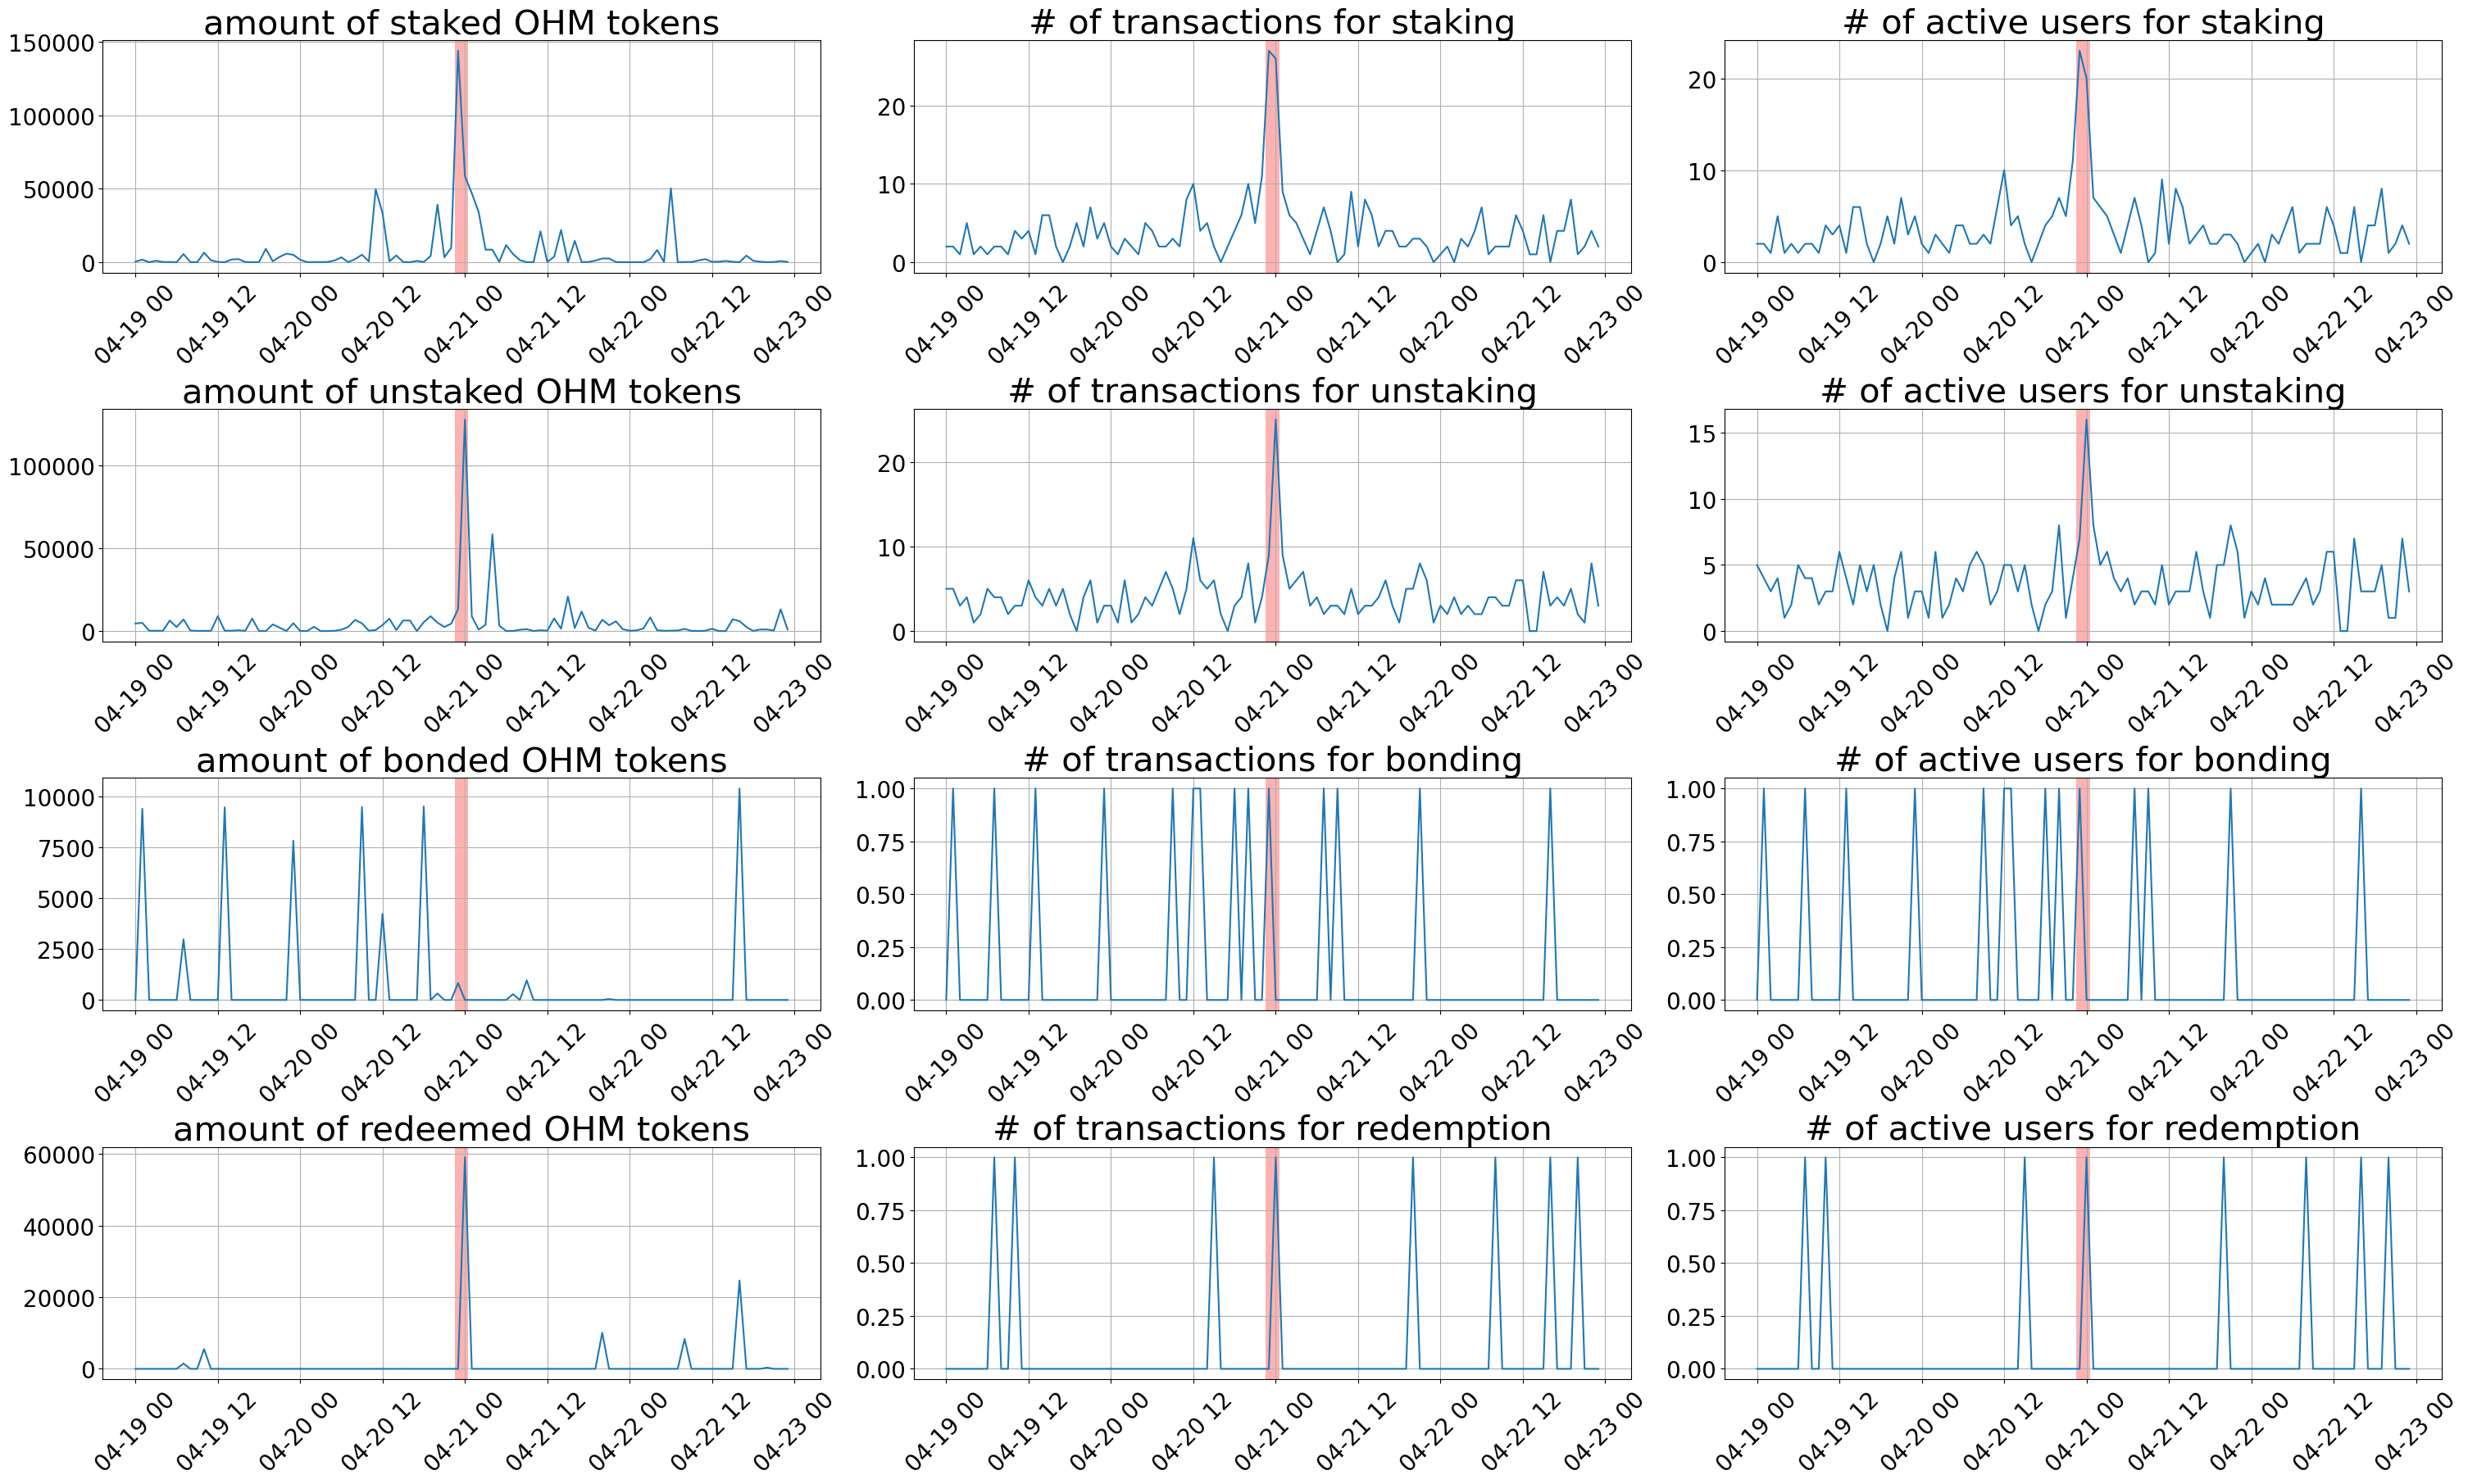

In [11]:
start = '2022-04-19 00:00:00'
end = '2022-04-23 00:00:00'

a_s = datetime(2022, 4, 20, 22, 30)
a_e = datetime(2022, 4, 21, 0, 30)

show_case(start, end, a_s, a_e, 'case1.png', show_hour=True)

**Case 2**

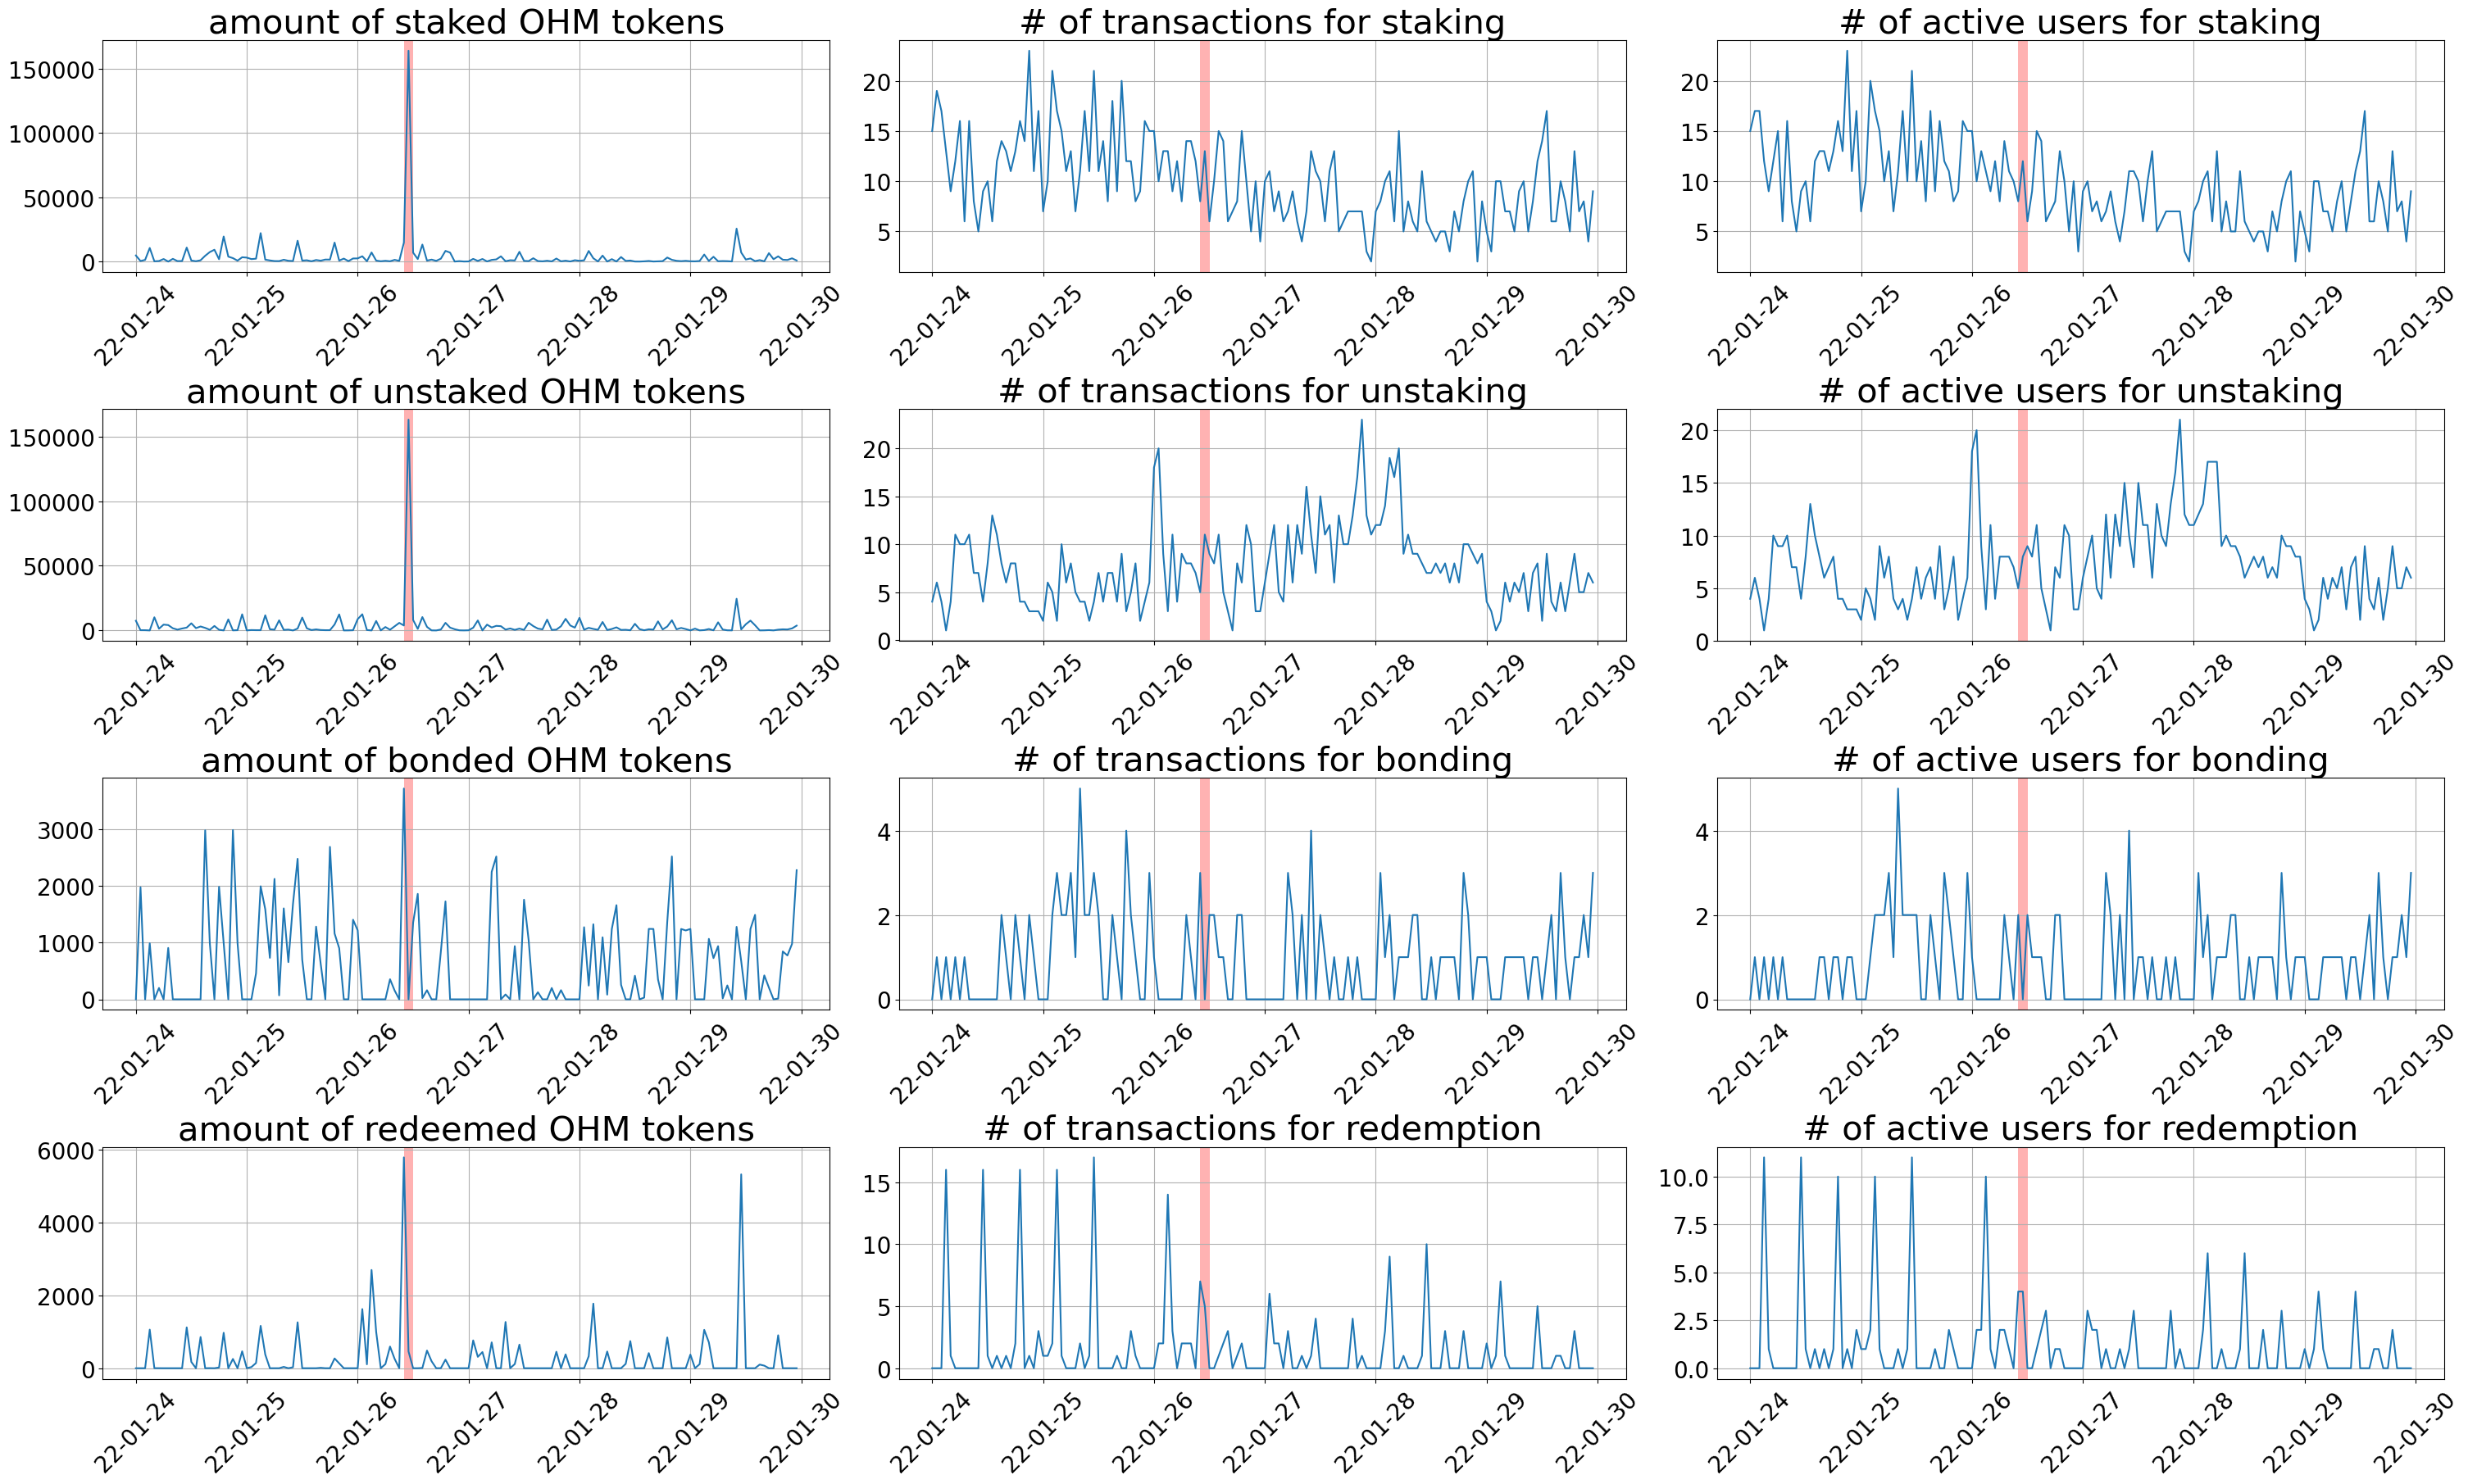

In [12]:
start = '2022-01-24 00:00:00'
end = '2022-01-30 00:00:00'

a_s = datetime(2022, 1, 26, 10, 0)
a_e = datetime(2022, 1, 26, 12, 0)

show_case(start, end, a_s, a_e, 'case2.png')

**Case 3**

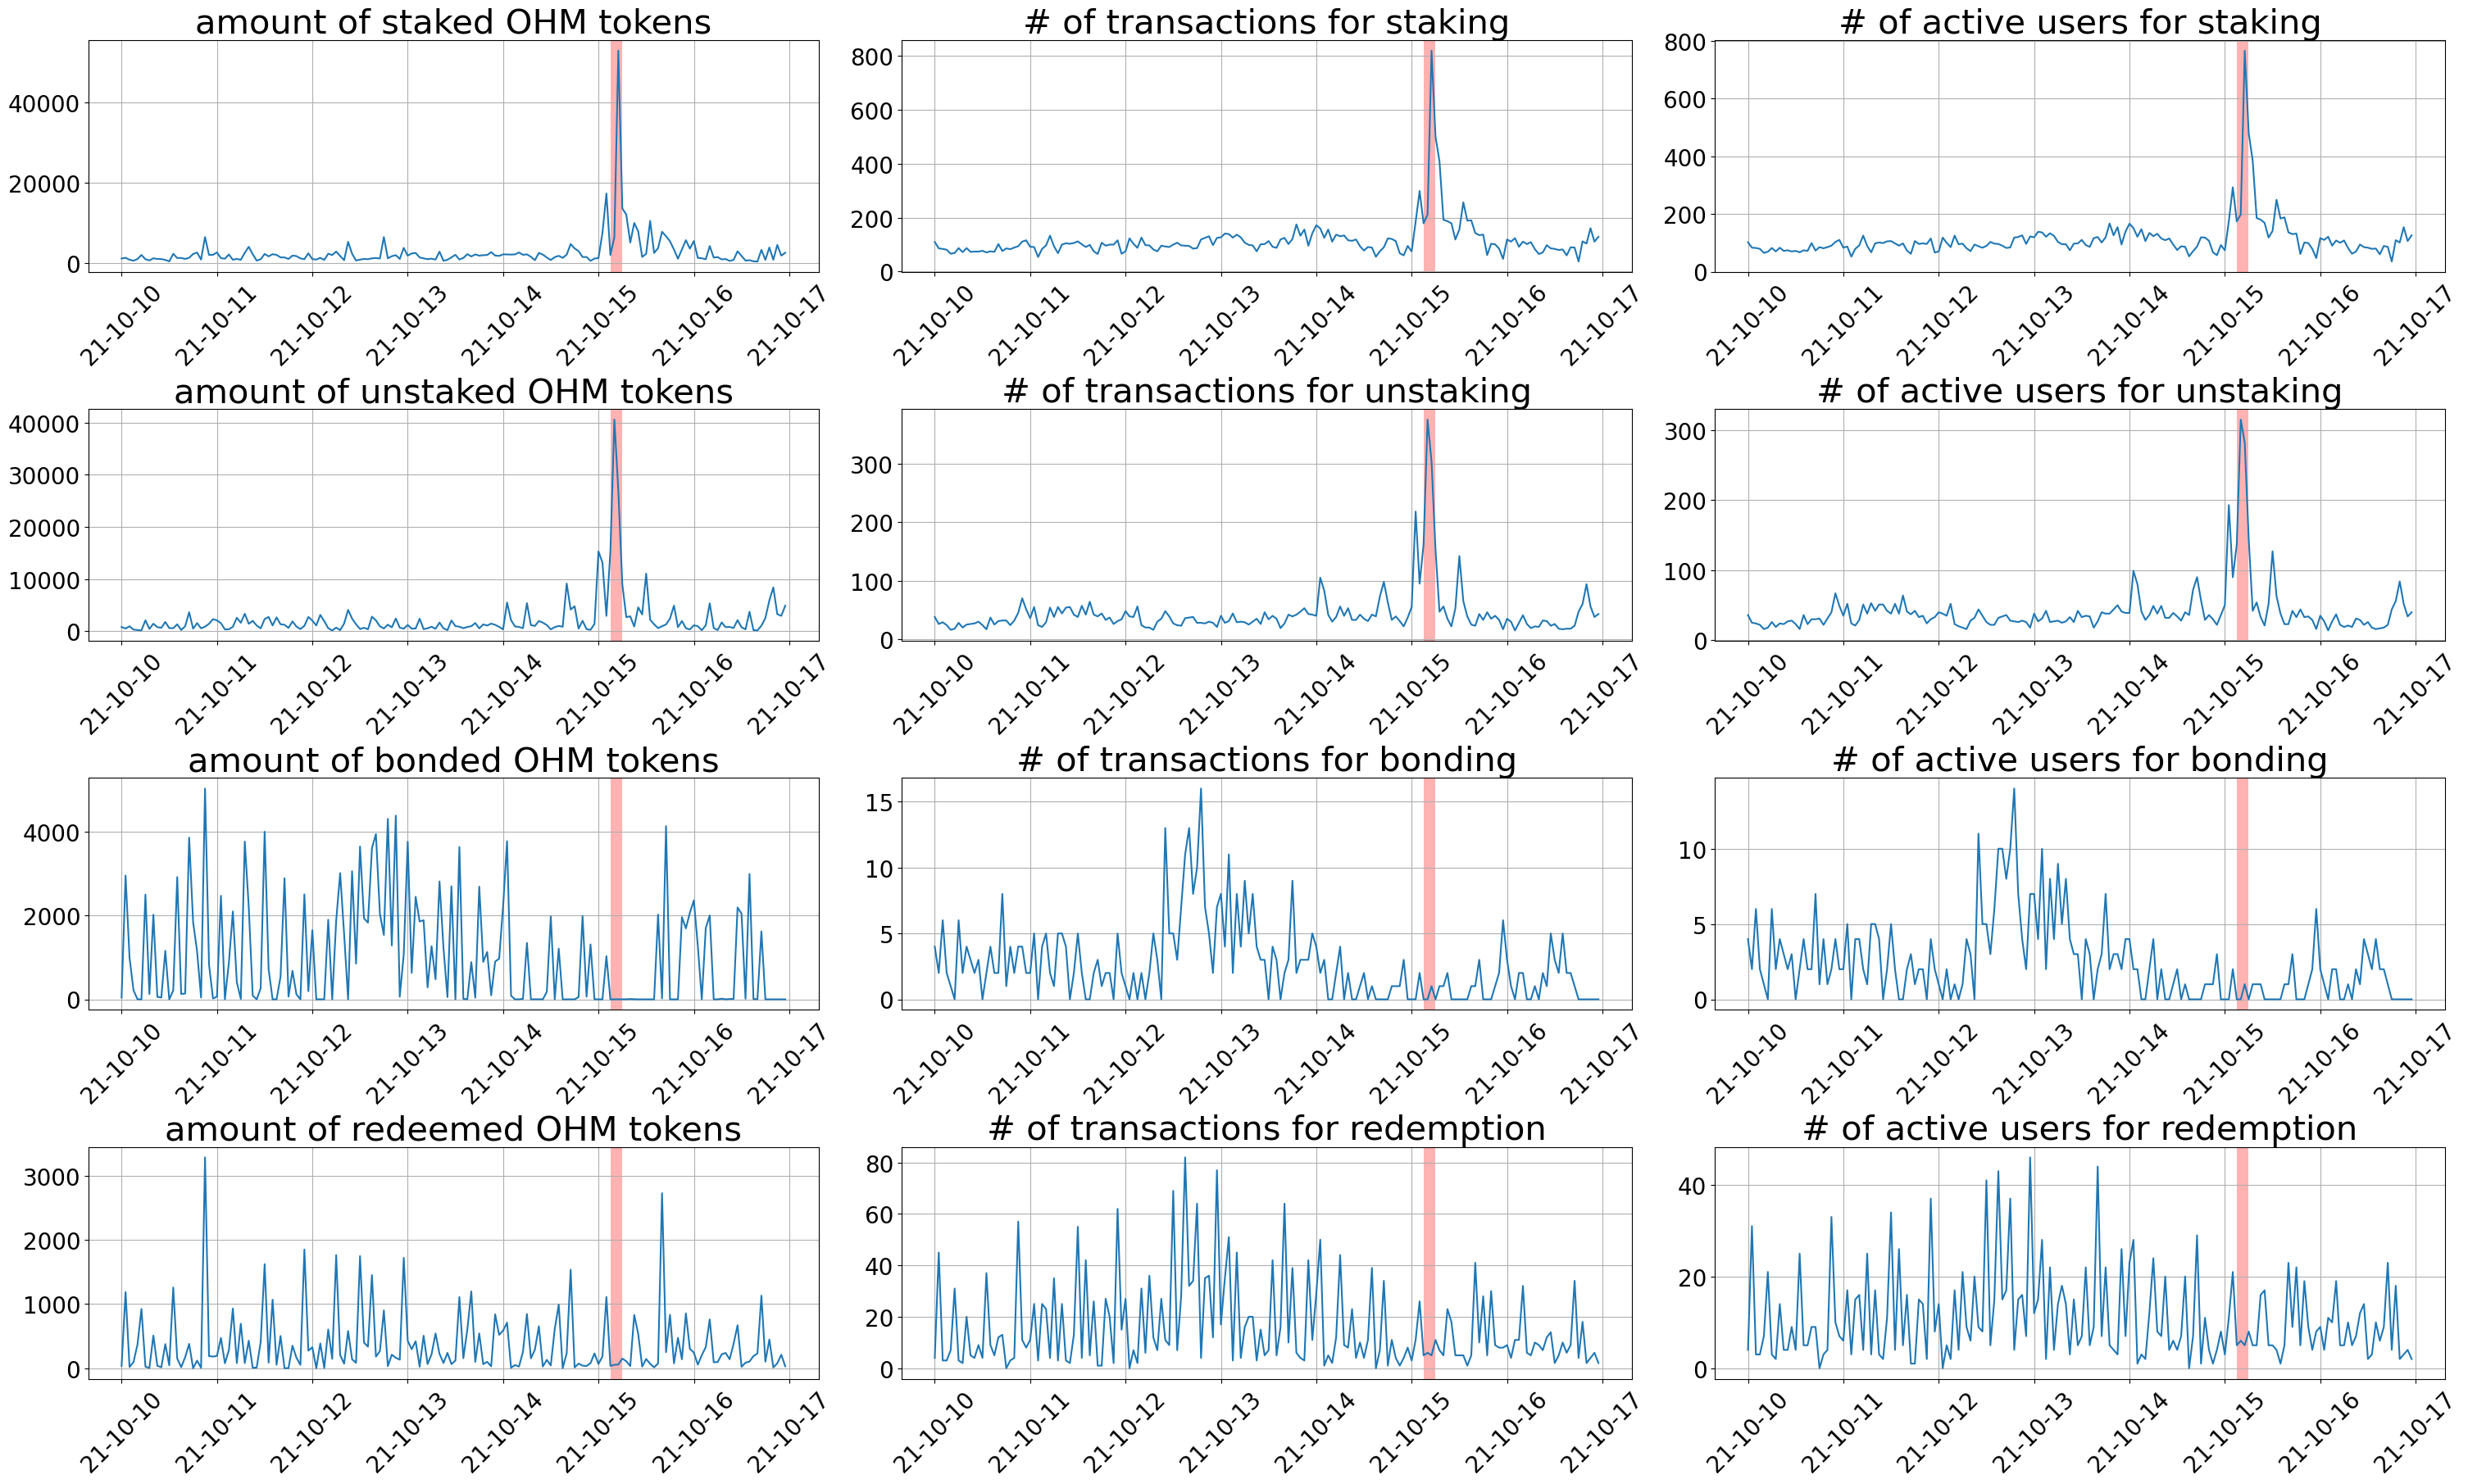

In [13]:
start = '2021-10-10 00:00:00'
end = '2021-10-17 00:00:00'

a_s = datetime(2021, 10, 15, 3, 00)
a_e = datetime(2021, 10, 15, 6, 00)

show_case(start, end, a_s, a_e, 'case3.png')

**Case 4**

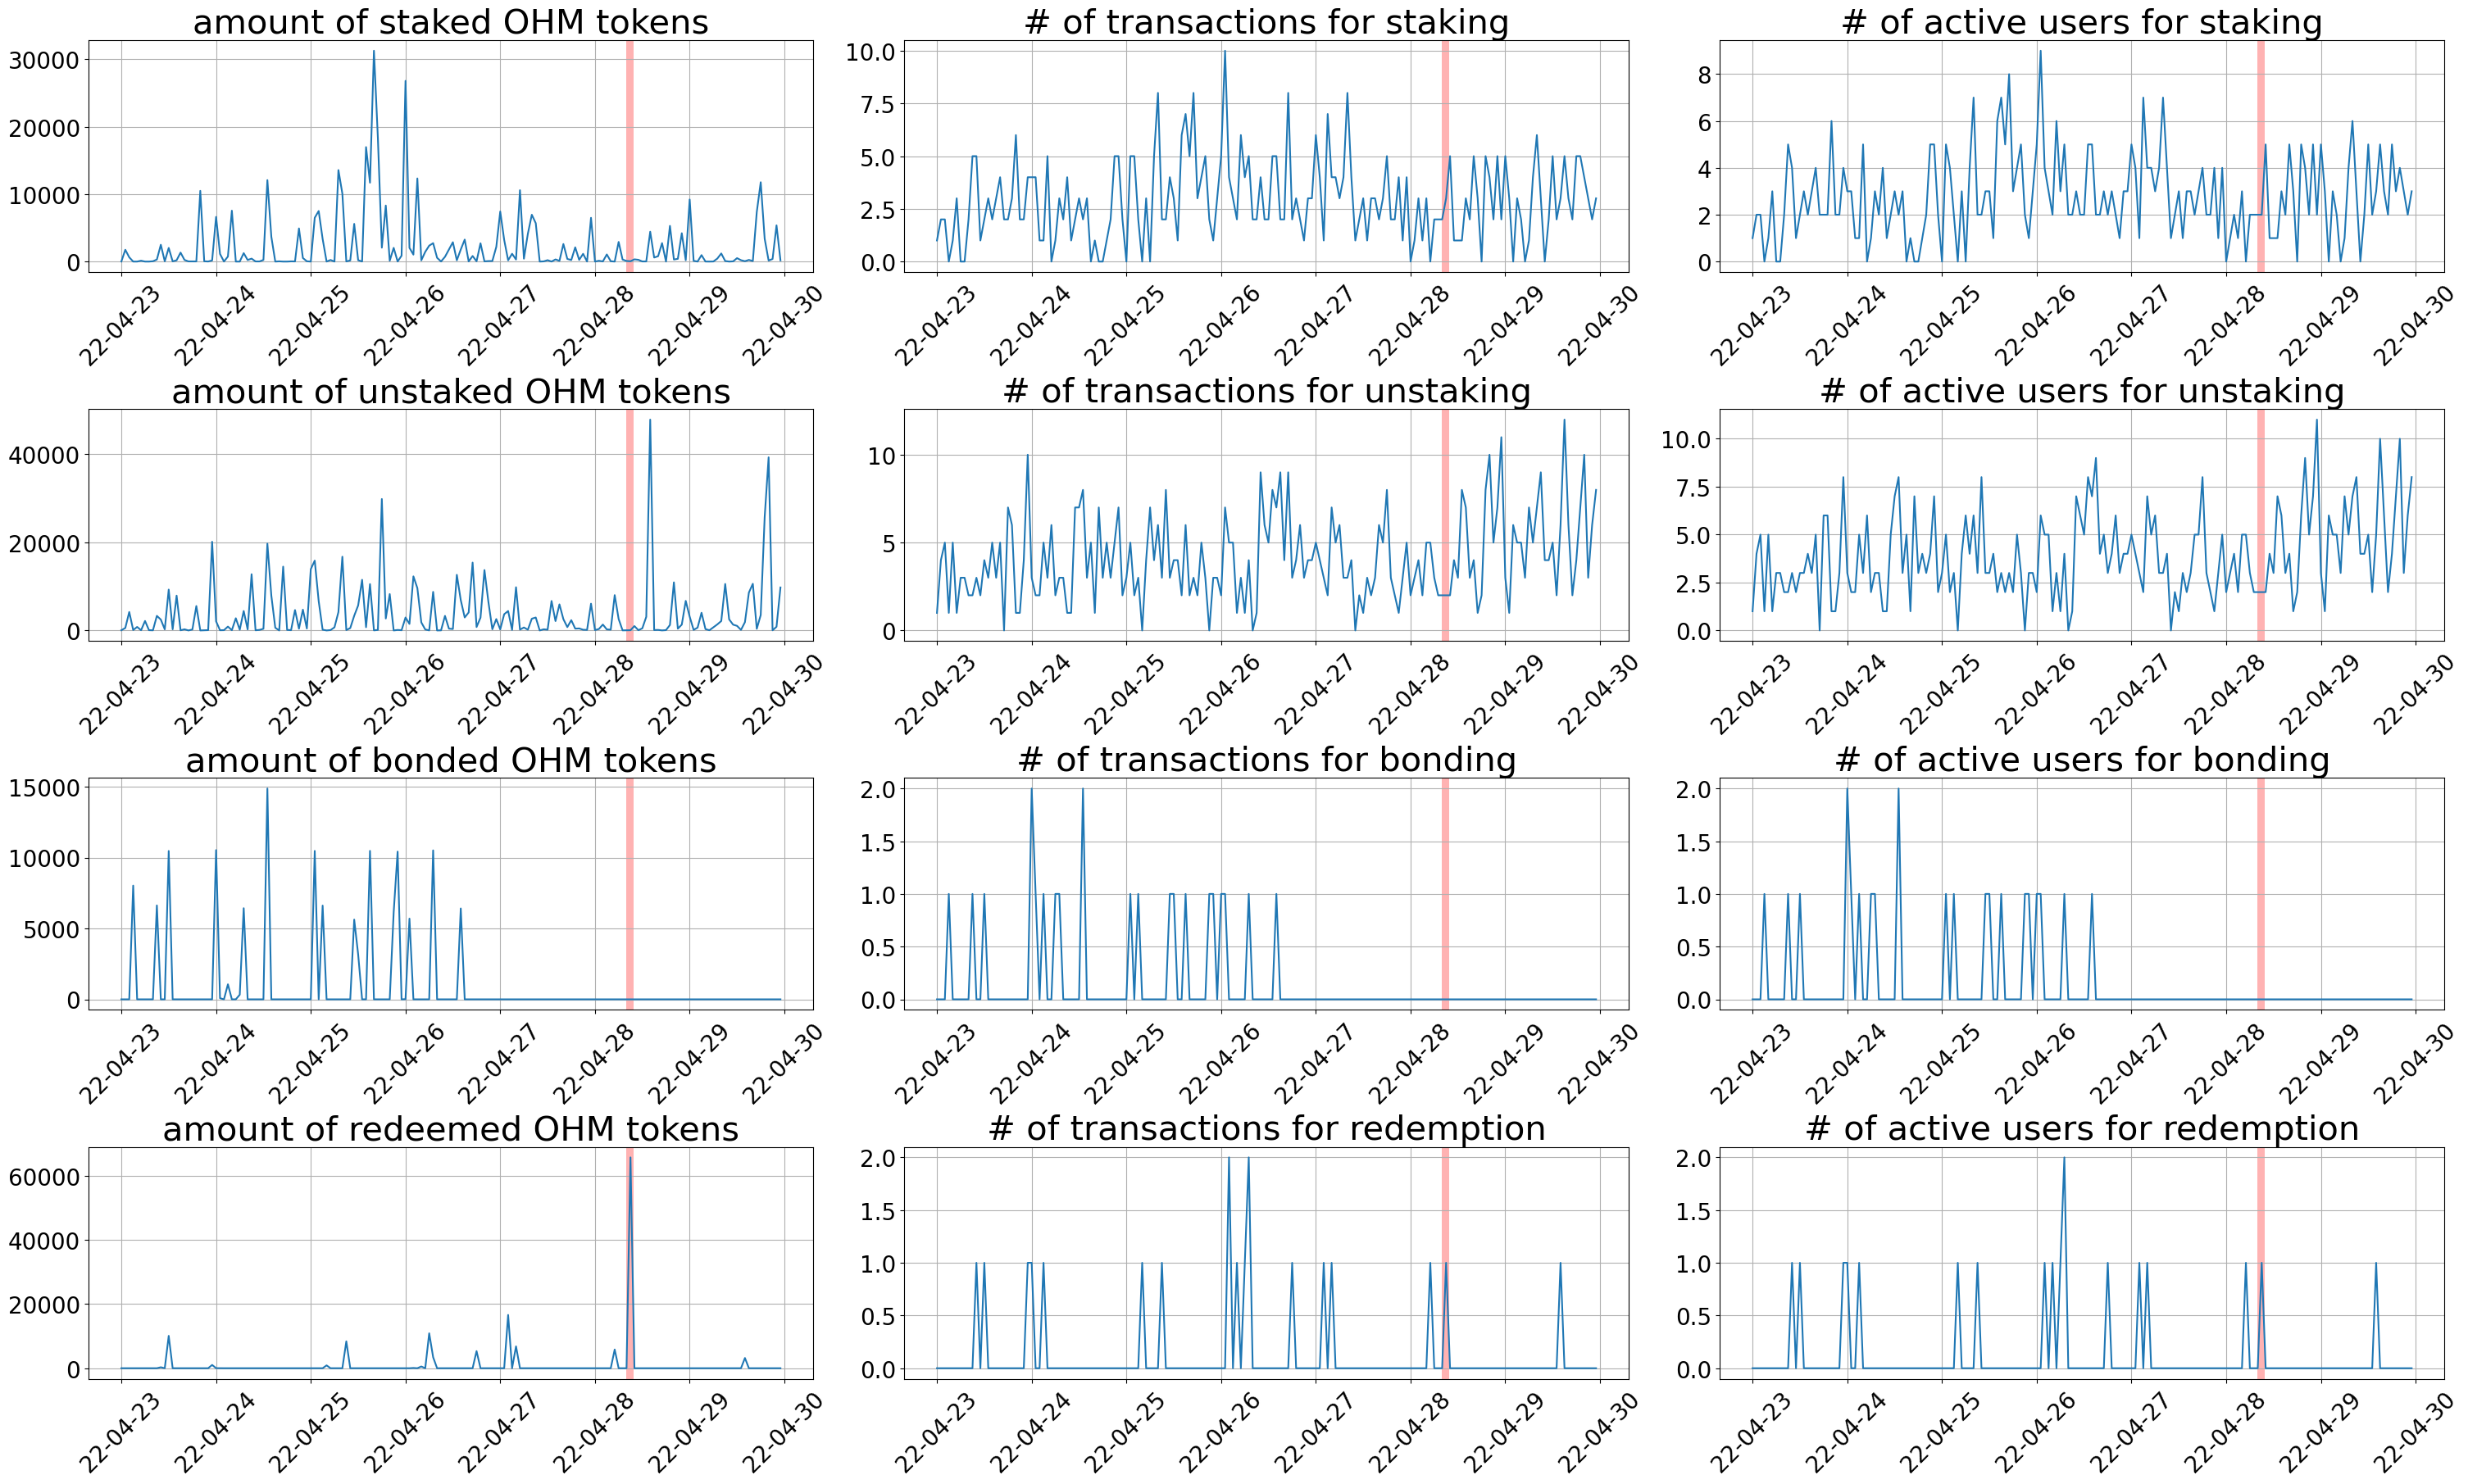

In [14]:
start = '2022-04-23 00:00:00'
end = '2022-04-30 00:00:00'

a_s = datetime(2022, 4, 28, 8, 00)
a_e = datetime(2022, 4, 28, 9, 50)

show_case(start, end, a_s, a_e, 'case4.png')